In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset')   #reading data

In [3]:
df.shape
df.isnull().sum()  #chexking if null is there in any colomn
df.info() #finding how many colomns have catagorical values
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

(649, 33)

In [4]:
df['school'].unique()   #binary
df['sex'].unique()
#df['famsize'].unique()

array(['F', 'M'], dtype=object)

In [5]:
df['school'].value_counts()  #checking how many students from each school

GP    423
MS    226
Name: school, dtype: int64

In [6]:
df['paid'].value_counts()  #maximum 'no' values (6%) so we can deelete this colomn 
#df['Dalc'].value_counts()

no     610
yes     39
Name: paid, dtype: int64

In [7]:
new = df.drop(['paid'],axis = 1) #removed the paid feature
new.shape

(649, 32)

In [8]:
new.dtypes[new.dtypes == 'object'].count()  #finding which/how many cols have object data type

16

In [9]:
new['Pstatus'].value_counts()  #checking of any feature has almost constant values
new['address'].value_counts()
new['higher'].value_counts()
new['Dalc'].value_counts()


1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

In [10]:
new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
#for features -  MJOB,FJOB,REASON AND GUARDIAN WE HAVE TO DO ONE HOT ENCODING AS MORE THAN ONE CATEGORY IN
#THESE FEATURES

In [12]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

LEBEL ENCODING FEATURES WITH BINARY CATAGORICAL VALUES + NOMINAL

In [13]:
from sklearn.preprocessing import LabelEncoder


categ = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher',
       'internet', 'romantic']

# Encode Categorical Columns
le = LabelEncoder()
new[categ] = new[categ].apply(le.fit_transform) #col = le.fit_trnasform(col)
extra = new

#the features in categ are transfomed into binary values

In [14]:
#want to check correlation of Medu with G3
my_corr = new[['Medu','Fedu','G3']].corr()
my_corr

#as both Medu and Fedu has similar correlation with G3, we can take a feature that represents theeir
#average - WILL DO IN THE FUTURE

,Medu,Fedu,G3
Medu,1.000000,0.647477,0.240151
Fedu,0.647477,1.000000,0.211800
G3,0.240151,0.211800,1.000000


One Hot Encodeing for ordinal features - Mjob,Fjob,reason,guardian

In [15]:
#pd.get_dummies()
lis = ['Mjob','Fjob','reason','guardian']
new = pd.get_dummies(new,columns = lis)
new.head()
#print(new.shape())
new.shape

(649, 45)

In [16]:
#for the features with one hot encoding, we are deleting the other lebelled row, to reduce col no. (dont run cell)

new = new.drop(['Mjob_other','Fjob_other','reason_other','guardian_other'],axis = 1)  #(dropped from new)
new.shape
new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,1,0,0,0,1
1,0,0,17,1,0,1,1,1,1,2,...,0,0,0,0,0,1,0,0,1,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,0,1,0,0,1
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,...,0,0,0,0,0,1,0,0,0,1
645,1,0,18,1,1,1,3,1,1,2,...,1,0,0,1,0,1,0,0,0,1
646,1,0,18,1,0,1,1,1,2,2,...,0,0,0,0,0,1,0,0,0,1
647,1,1,17,1,1,1,3,1,2,1,...,0,0,0,1,0,1,0,0,0,1


In [17]:
#dropping famsize as correlation with G3 is 1% 
view = new[['traveltime','G3','famsize','age','sex']].corr()
view
new = new.drop(['famsize'],axis = 1)
new

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,0,0,18,1,0,4,4,2,2,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,17,1,1,1,1,1,2,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,15,1,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,15,1,1,4,2,1,3,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,16,1,1,3,3,1,2,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,2,3,1,3,1,...,0,0,0,0,0,1,0,0,0,1
645,1,0,18,1,1,3,1,1,2,0,...,1,0,0,1,0,1,0,0,0,1
646,1,0,18,1,1,1,1,2,2,0,...,0,0,0,0,0,1,0,0,0,1
647,1,1,17,1,1,3,1,2,1,0,...,0,0,0,1,0,1,0,0,0,1


In [18]:
new.head()

,school,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,0,0,18,1,0,4,4,2,2,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,17,1,1,1,1,1,2,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,15,1,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,15,1,1,4,2,1,3,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,16,1,1,3,3,1,2,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [20]:
#checking corr and dropping Pstatus .007%

res = new[['romantic','G3','goout','Pstatus']].corr()
res
new = new.drop(['Pstatus'],axis = 1)
cor = new.corr()
#a = (cor.loc['G3']<0.05)
#a
cor
#res
#new.shape

,school,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
school,1.000000,-0.083050,0.087170,-0.354520,-0.254787,-0.209806,0.252936,-0.137857,0.113788,-0.123340,-0.063720,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294,0.199124,-0.070628,-0.122055,-0.103729,0.136385,-0.052641,0.064697,-0.092356,0.122226,-0.137548,-0.162282,0.066452,-0.052590
sex,-0.083050,1.000000,-0.043662,0.025503,0.119127,0.083913,0.040880,-0.206214,0.073888,-0.111202,-0.129467,0.124707,-0.043603,-0.058134,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077,-0.133779,0.039825,0.055879,0.104647,-0.053666,-0.007233,0.047612,0.044416,-0.049307,0.059079,-0.027289,0.039055,-0.030708
age,0.087170,-0.043662,1.000000,-0.025848,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,0.088980,-0.100237,-0.034880,-0.046692,0.055275,-0.103504,-0.024570,-0.054154,0.030345,-0.014716,-0.016565,-0.136786,-0.048726
address,-0.354520,0.025503,-0.025848,1.000000,0.190320,0.141493,-0.344902,0.062023,-0.063824,0.017956,0.005577,-0.009278,0.018077,0.076706,0.175794,-0.030939,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637,-0.165307,0.084131,0.101131,0.073149,0.023822,0.072167,0.014508,0.028221,-0.070834,0.161183,-0.012882,0.003491,0.015464
Medu,-0.254787,0.119127,-0.107832,0.190320,1.000000,0.647477,-0.265079,0.097006,-0.172210,-0.022168,0.120491,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151,-0.376636,0.261215,0.130272,0.449847,-0.097313,0.155576,-0.012576,0.258136,-0.119602,0.036580,0.132502,-0.040792,0.091562
Fedu,-0.209806,0.083913,-0.121050,0.141493,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.023572,0.135191,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800,-0.198240,0.140789,0.104368,0.312130,-0.107575,0.227081,0.026575,0.348874,-0.068893,0.017710,0.085076,0.086158,-0.044450
traveltime,0.252936,0.040880,0.034490,-0.344902,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.044807,-0.039289,-0.033376,-0.011509,-0.071958,-0.190826,0.004751,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,0.173772,-0.104606,-0.072497,-0.097961,-0.040854,-0.089981,-0.031740,-0.040209,0.132636,-0.125946,-0.076058,0.019455,-0.066130
studytime,-0.137857,-0.206214,-0.008415,0.062023,0.097006,0.050400,-0.063154,1.000000,-0.147441,0.089316,0.143509,0.070080,0.042630,0.188256,0.037529,0.033036,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,-0.039569,-0.018978,0.029369,0.035469,-0.008220,0.096471,0.014716,-0.020335,-0.083301,-0.011796,0.179023,0.015804,-0.018076
failures,0.113788,0.073888,0.319968,-0.063824,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.000745,-0.006982,0.000561,-0.069241,-0.309400,-0.095330,0.069901,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,0.096358,-0.016391,0.011652,-0.123945,0.038892,-0.057688,-0.006725,-0.079352,0.161132,-0.080719,-0.111185,-0.073165,-0.056527
schoolsup,-0.123340,-0.111202,-0.167841,0.017956,-0.022168,0.023572,-0.044807,0.089316,-0.000745,1.000000,0.075402,-0.030246,0.017846,0.085355,-0.025942,-0.094310,-0.012038,-0.015611,-0.058124,-0.028076,-0.098275,0.022760,-0.059503,-0.071779,-0.

<AxesSubplot:>

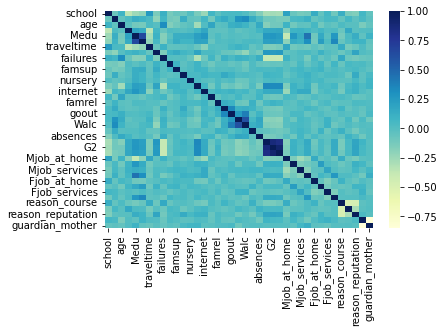

In [21]:
import seaborn as sns
sns.heatmap(cor, cmap = 'YlGnBu')

In [22]:
new.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother'], dtype='object')

In [23]:
#deleting further features with less than 5% correlation
new = new.drop(['reason_home','Fjob_at_home','nursery','Fjob_health', 'Fjob_services',
          'guardian_father', 'guardian_mother','Mjob_services'],axis = 1)
new






,school,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_teacher,Fjob_teacher,reason_course,reason_reputation
0,0,0,18,1,4,4,2,2,0,1,0,0,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,1,1,0
1,0,0,17,1,1,1,1,2,0,0,1,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,1,0
2,0,0,15,1,1,1,1,2,0,1,0,0,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0
3,0,0,15,1,4,2,1,3,0,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0
4,0,0,16,1,3,3,1,2,0,0,1,0,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,2,3,1,3,1,0,0,1,1,1,0,5,4,2,1,2,5,4,10,11,10,0,0,0,0,1,0
645,1,0,18,1,3,1,1,2,0,0,1,0,1,1,0,4,3,4,1,1,1,4,15,15,16,0,0,1,0,1,0
646,1,0,18,1,1,1,2,2,0,0,0,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0,0,0,0,1,0
647,1,1,17,1,3,1,2,1,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0,0,0,0,1,0


In [24]:
new.shape
new.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_teacher', 'Fjob_teacher', 'reason_course', 'reason_reputation'], dtype='object')

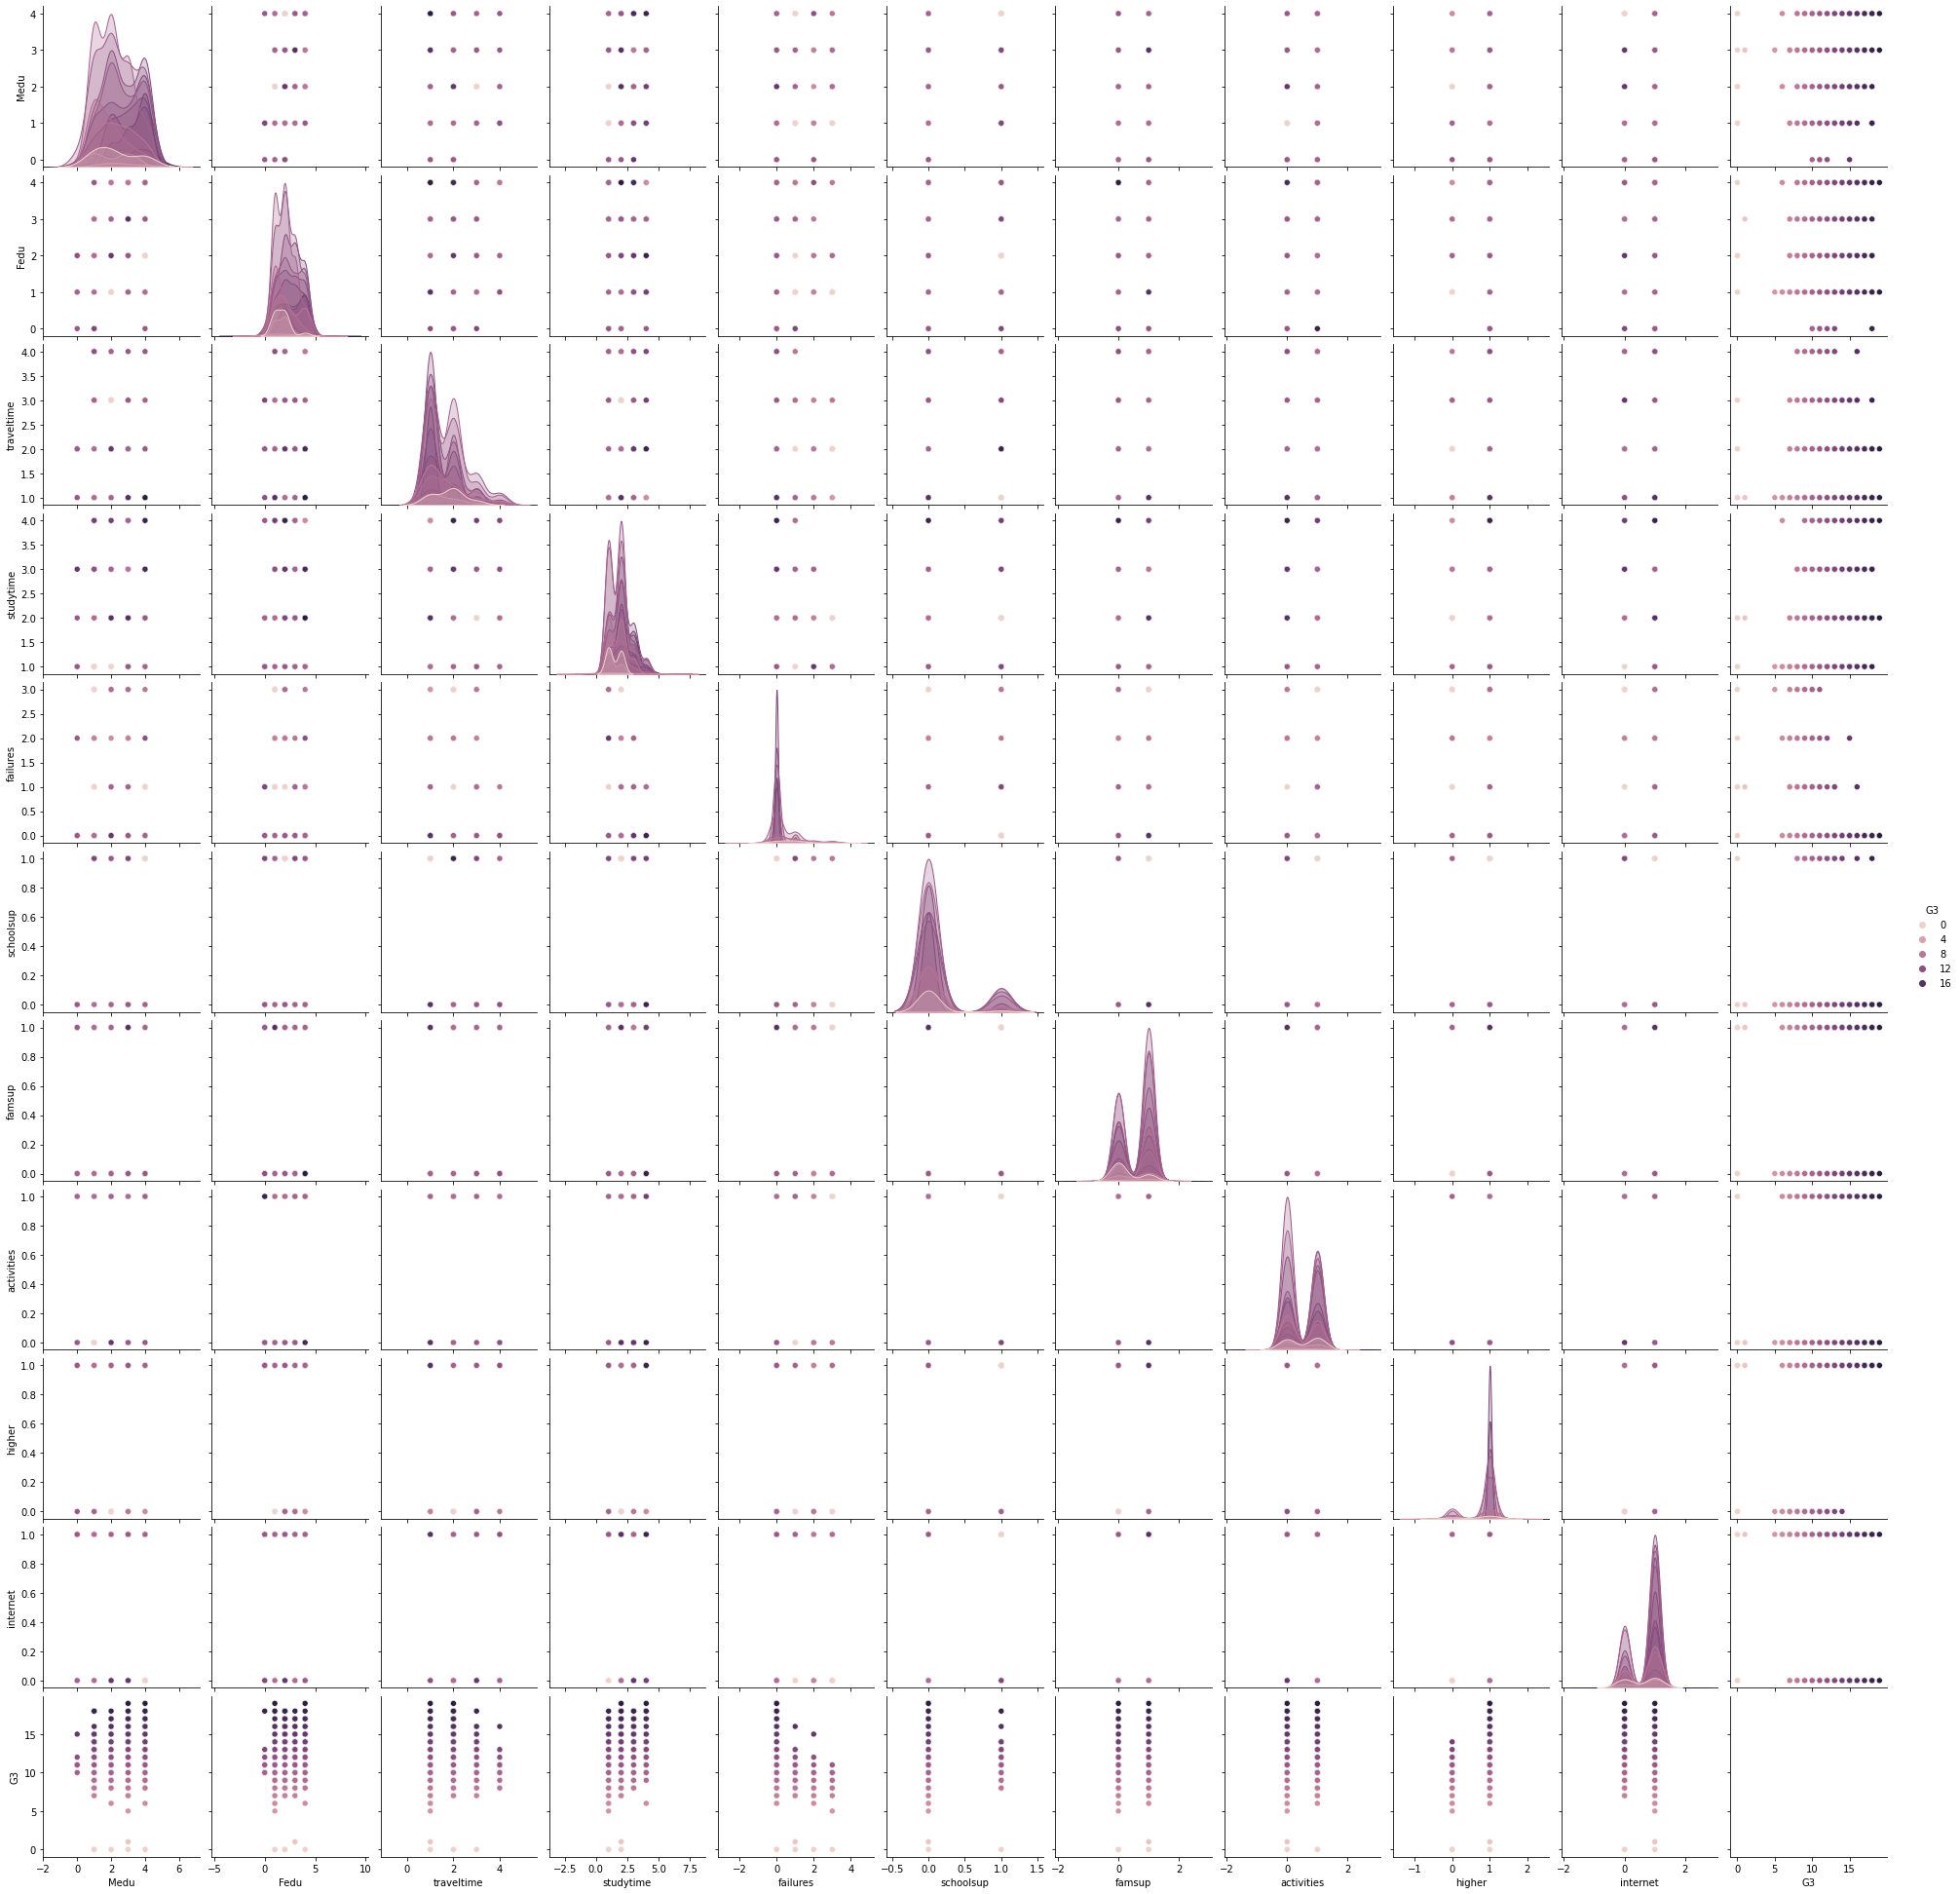

In [25]:
sns.pairplot(new,hue = 'G3',vars = ['Medu', 'Fedu', 'traveltime', 
                                    'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'higher', 'internet','G3'])






In [36]:
new.columns

new1 = new
new1 = new1.drop(['Mjob_at_home','Mjob_health','Mjob_teacher','Fjob_teacher','reason_course','reason_reputation'],axis = 1)
new1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   Medu        649 non-null    int64
 5   Fedu        649 non-null    int64
 6   traveltime  649 non-null    int64
 7   studytime   649 non-null    int64
 8   failures    649 non-null    int64
 9   schoolsup   649 non-null    int64
 10  famsup      649 non-null    int64
 11  activities  649 non-null    int64
 12  higher      649 non-null    int64
 13  internet    649 non-null    int64
 14  romantic    649 non-null    int64
 15  famrel      649 non-null    int64
 16  freetime    649 non-null    int64
 17  goout       649 non-null    int64
 18  Dalc        649 non-null    int64
 19  Walc        649 non-null    int64
 20  health      649 non-null    int6

In [44]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [61]:
##START FROM HERE

x = new1.iloc[:,:24].values
y = new1.iloc[:,24].values


In [67]:
#y1 = pd.DataFrame(y)


In [68]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

[17 11 16 13 11 16 17 10 11 11 16 12 13 10 11 13 11  8 18 17 15 13 13 16
 16 13 10 14 13 16 16 15 10 10 16 17 14 13 13 13 16 10  8 14 13 14 18 13
 12 13 10 12 16 10 11 16 11 12 10 11 10 12 17 14 17 15 10 10 10 11 16 14
 13 16 14 13 13 15 13 13 11 10 16  8 11 18 13  8 14 10 17 10 12 17 10 16
 15  9 11 10 13 11 12 10 14 10 10 13 10 13 15  8 13 10  8 10 11 16 16  8
 13  0 15 13 13  8 18 11 13  9]


/Users/samihaafafneha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/samihaafafneha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print( accuracy_score(y_test, predictions))

0.3076923076923077
